# Claves para el éxito en el preprocesamiento:
1. Limpieza del texto:
* **Eliminación de caracteres irrelevantes:** Quitar números, caracteres especiales y puntuación.
* **Minúsculas:** Convertir todo el texto a minúsculas para evitar duplicados debido a diferencias de mayúsculas y minúsculas.
* **Eliminación de stopwords:** Las palabras como "el", "la", "de", "que" no aportan información útil para la clasificación.
* **Normalización:** Lemmatización o stemming para reducir las palabras a su raíz (ej. "jugando" -> "jugar").     


2. Feature Engineering:
* **TF-IDF:** La técnica más común para vectorizar el texto. Ayuda a capturar la importancia relativa de las palabras en el contexto de todo el corpus.
* **Bigramas o Trigramas:** Además de las palabras individuales (unigrama), se pueden capturar pares o tríos de palabras que aparecen frecuentemente en reseñas, lo que puede mejorar el desempeño del modelo, especialmente en análisis de sentimientos.
* **Longitud del texto:** A veces, la longitud de una reseña puede ser un buen indicador de la calificación. Podrías considerar agregar una característica que sea la longitud del Summary o Text.
* **Palabras positivas y negativas:** Crear una característica que capture el número de palabras positivas/negativas puede ser útil, dado que los productos con calificaciones más altas tienden a tener palabras más positivas en sus reseñas.

In [18]:

# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import f1_score
# import json

# # 1. Cargar los archivos CSV
# train_data = pd.read_csv('train/train.csv')
# test_data = pd.read_csv('test/test.csv')

# # 2. Preprocesamiento básico del texto (limpieza simple)
# def clean_text(text):
#     text = text.lower()  # Convertir a minúsculas
#     text = ''.join([char if char.isalnum() or char.isspace() else ' ' for char in text])  # Eliminar puntuación
#     return text

# train_data['Summary'] = train_data['Summary'].apply(clean_text)
# train_data['Text'] = train_data['Text'].apply(clean_text)
# test_data['Summary'] = test_data['Summary'].apply(clean_text)
# test_data['Text'] = test_data['Text'].apply(clean_text)

# # 3. Crear una nueva columna combinando el resumen y el texto
# train_data['Combined'] = train_data['Summary'] + " " + train_data['Text']
# test_data['Combined'] = test_data['Summary'] + " " + test_data['Text']

# # 4. Vectorización del texto usando TF-IDF
# vectorizer = TfidfVectorizer(max_features=5000)  # Ajuste de características (ajustar según sea necesario)
# X_train = vectorizer.fit_transform(train_data['Combined'])
# X_test = vectorizer.transform(test_data['Combined'])

# # 5. Etiquetas de entrenamiento (Suponemos que Score es la etiqueta que hay que predecir)
# y_train = train_data['Score']

# # 6. Entrenamiento del modelo: Regresión logística
# model = LogisticRegression(max_iter=1000)  # Ajustar según sea necesario
# model.fit(X_train, y_train)

# # 7. Predicción para el conjunto de prueba
# predictions = model.predict(X_test)

# # 8. Crear el archivo predictions.json
# predictions_dict = {str(test_data['Test_id'][i]): int(predictions[i]) for i in range(len(predictions))}

# # Guardar las predicciones en el formato adecuado
# with open('predictions/example_predictions.json', 'w') as f:
#     json.dump({'target': predictions_dict}, f)

# print("Predicciones generadas y guardadas en 'predictions/example_predictions.json'")

In [53]:
import pandas as pd

train = pd.read_csv("train/train.csv", sep=";")
test = pd.read_csv("train/train.csv", sep=";")


In [ ]:
# pip install gensim

   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ------- -------------------------------- 4.7/24.0 MB 31.6 MB/s eta 0:00:01
   --------------------- ------------------ 13.1/24.0 MB 34.3 MB/s eta 0:00:01
   ---------------------------------- ----- 20.7/24.0 MB 34.4 MB/s eta 0:00:01
   ---------------------------------------- 24.0/24.0 MB 31.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/45.9 MB ? eta -:--:--
   ------ --------------------------------- 7.9/45.9 MB 37.4 MB/s eta 0:00:02
   -------------- ------------------------- 16.5/45.9 MB 38.5 MB/s eta 0:00:01
   --------------------- ------------------ 24.6/45.9 MB 39.0 MB/s eta 0:00:01
   ---------------------------- ----------- 32.5/45.9 MB 38.9 MB/s eta 0:00:01
   ---------------------------------- ----- 39.8/45.9 MB 38.4 MB/s eta 0:00:01
   ---------------------------------------  45.1/45.9 MB 36.3 MB/s eta 0:00:01
   ---------------------------------------- 45.9/45.9 MB 33.6 MB/s eta 0

  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
train

,Score,Summary,Text
0,1,Why the white tea blend?,I really cannot emphasize how disappointed I a...
1,1,Horrible quality,The shipment I received had soooooo much powde...
2,4,The Jalapeno Story,I love the taste of jalapenos but not if they'...
3,5,Addictive!,These sunflower seeds are incredible. They ar...
4,5,Brings back memories of my Mother's lemon pies,My sister and I were discussing how delicious ...
...,...,...,...
20924,5,Great Tea Great Price,We drink alot of green tea mixed with our home...
20925,5,Excellent and Different!!,This popcorn is really fresh and yummy! It is ...
20926,5,Great customer service,3 of the 4 jars of coconut oil had leaked into...
20927,5,deez nutz.,great deal on these nuts. whole family loves t...


In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Score    21000 non-null  int64 
 1   Summary  20999 non-null  object
 2   Text     20929 non-null  object
dtypes: int64(1), object(2)
memory usage: 492.3+ KB


In [23]:
train["Summary"]

0                              Why the white tea blend?
1                                      Horrible quality
2                                    The Jalapeno Story
3                                            Addictive!
4        Brings back memories of my Mother's lemon pies
                              ...                      
20924                             Great Tea Great Price
20925                         Excellent and Different!!
20926                            Great customer service
20927                                        deez nutz.
20928                                        Love them!
Name: Summary, Length: 20929, dtype: object

In [24]:
train["Text"]

0        I really cannot emphasize how disappointed I a...
1        The shipment I received had soooooo much powde...
2        I love the taste of jalapenos but not if they'...
3        These sunflower seeds are incredible.  They ar...
4        My sister and I were discussing how delicious ...
                               ...                        
20924    We drink alot of green tea mixed with our home...
20925    This popcorn is really fresh and yummy! It is ...
20926    3 of the 4 jars of coconut oil had leaked into...
20927    great deal on these nuts. whole family loves t...
20928    These are soooo good. You can taste the carame...
Name: Text, Length: 20929, dtype: object

# Score balanceado?

C:\Users\Jjaavviieerroperro\AppData\Local\Temp\ipykernel_15456\3052543944.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train["Score"], palette="viridis")


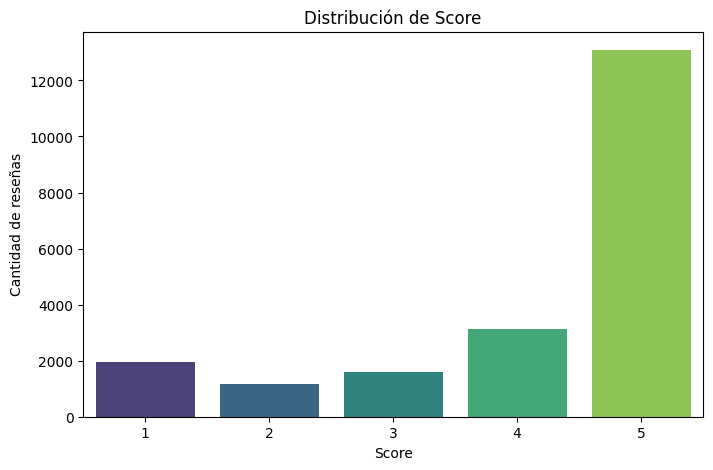

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar la cantidad de ejemplos por cada Score
plt.figure(figsize=(8,5))
sns.countplot(x=train["Score"], palette="viridis")

plt.title("Distribución de Score")
plt.xlabel("Score")
plt.ylabel("Cantidad de reseñas")
plt.show()


In [26]:
train["Score"].value_counts()

Score
5    13083
4     3134
1     1956
3     1586
2     1170
Name: count, dtype: int64

In [ ]:
# pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 13.4 MB/s eta 0:00:00


# Primera OPCIÓN con 493/900 pts

In [58]:
import pandas as pd
import gensim.downloader as api
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score
import json

In [59]:
# Descargar stopwords de NLTK
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jjaavviieerroperro\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jjaavviieerroperro\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Package wordnet is already up-to-date!


True

In [60]:
# Cargar el modelo preentrenado de FastText
model = api.load("glove-wiki-gigaword-100")

[==================================================] 100.0% 128.1/128.1MB downloaded


In [61]:
# Función para obtener el vector promedio de un texto
def get_average_vector(text, model):
    tokens = text.split()  # Tokenizamos el texto
    vectors = [model[word] for word in tokens if word in model]  # Conseguimos el vector de cada palabra
    if len(vectors) > 0:
        return sum(vectors) / len(vectors)  # Promediamos los vectores
    else:
        return np.zeros(model.vector_size)  # Si no hay vectores, devolvemos un vector de ceros

# Función para limpiar el texto
def clean_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar caracteres especiales, números y puntuación
    text = re.sub(r'[^a-záéíóúñ\s]', '', text)
    return text

In [62]:
# Función para eliminar stopwords y lematizar
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('spanish'))

def preprocess_text(text):
    words = text.split()
    # Eliminar stopwords y lematizar
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(cleaned_words)

In [65]:
# Cargar y limpiar los conjuntos de datos
train = pd.read_csv('train/train.csv', sep=';')
test = pd.read_csv('test/test.csv', sep=';')

# Llenar valores nulos en 'Summary' y 'Text' con cadenas vacías
train['Summary'] = train['Summary'].fillna('')
train['Text'] = train['Text'].fillna('')

# Crear la columna 'Review' concatenando 'Summary' y 'Text'
train['Review'] = train['Summary'] + ' ' + train['Text']

test['Summary'] = test['Summary'].fillna('')
test['Text'] = test['Text'].fillna('')
test['Review'] = test['Summary'] + ' ' + test['Text']

# Limpiar el texto en la columna 'Review'
train['Review'] = train['Review'].apply(clean_text)
test['Review'] = test['Review'].apply(clean_text)

# Aplicar la función de preprocesamiento al texto (eliminar stopwords y lematizar)
train['Review'] = train['Review'].apply(preprocess_text)
test['Review'] = test['Review'].apply(preprocess_text)

# Verifica que las columnas 'Review' se han creado correctamente
print(train.columns)  # Debería mostrar 'Review'
print(test.columns)   # Debería mostrar 'Review'

Index(['Score', 'Summary', 'Text', 'Review'], dtype='object')
Index(['Test_id', 'Summary', 'Text', 'Review'], dtype='object')


In [66]:
# Aplicar la función para obtener el vector promedio de las reseñas
train['Review_Vector'] = train['Review'].apply(lambda x: get_average_vector(x, model))
test['Review_Vector'] = test['Review'].apply(lambda x: get_average_vector(x, model))

# Verificar que las nuevas columnas han sido agregadas correctamente
print(train[['Review', 'Review_Vector']].head())  # Muestra las primeras filas para validar
print(test[['Review', 'Review_Vector']].head())   # Muestra las primeras filas para validar


                                              Review  \
0  why the white tea blend i really cannot emphas...   
1  horrible quality the shipment i received had s...   
2  the jalapeno story i love the taste of jalapen...   
3  addictive these sunflower seed are incredible ...   
4  brings back memory of my mother lemon pie my s...   

                                       Review_Vector  
0  [-0.20507424, 0.36003962, 0.33213353, -0.09768...  
1  [-0.13062128, 0.32978615, 0.4286799, -0.307330...  
2  [-0.2522357, 0.34309295, 0.27317682, -0.242495...  
3  [-0.17134266, 0.3456027, 0.29976436, -0.291950...  
4  [-0.16798367, 0.28093612, 0.18388237, -0.23464...  
                                              Review  \
0  smooth this is so far my favorite kcup very ri...   
1  full bodied rich taste i recently wa in winthr...   
2  first time bonsai fantastic for your first bon...   
3  very tasty this sesame oil is rich and aromati...   
4  are you kidding i can not believe the lack of ... 

In [67]:
# Inicializar el vectorizador TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limitar a 5000 características

# Ajustar y transformar el texto del conjunto de entrenamiento
X_tfidf = vectorizer.fit_transform(train['Review'])

# Ver las primeras características
print(f"Dimensiones de la matriz TF-IDF: {X_tfidf.shape}")

Dimensiones de la matriz TF-IDF: (21000, 5000)


In [68]:
# Crear una nueva característica 'Length' que es la longitud del texto
train['Length'] = train['Review'].apply(len)
test['Length'] = test['Review'].apply(len)

# Ver el resultado
print(train[['Review', 'Length', 'Score']].head())  # Muestra las primeras filas


                                              Review  Length  Score
0  why the white tea blend i really cannot emphas...     243      1
1  horrible quality the shipment i received had s...     132      1
2  the jalapeno story i love the taste of jalapen...     135      4
3  addictive these sunflower seed are incredible ...      83      5
4  brings back memory of my mother lemon pie my s...     199      5


In [69]:
# Inicializar el vectorizador con bigramas y trigramas
vectorizer_ngram = TfidfVectorizer(ngram_range=(1, 3), max_features=5000)

# Ajustar y transformar el texto del conjunto de entrenamiento
X_ngram = vectorizer_ngram.fit_transform(train['Review'])

# Ver las dimensiones de la matriz de n-gramas
print(f"Dimensiones de la matriz N-gramas: {X_ngram.shape}")

Dimensiones de la matriz N-gramas: (21000, 5000)


In [70]:
# Tomar las características de TF-IDF (o de n-gramas si lo prefieres)
X = X_tfidf  # O puedes usar X_ngram

# La variable objetivo (Score)
y = train['Score']

# Dividir el conjunto de datos en train y validación (70% / 30%)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# Ver las dimensiones
print(f"Entrenamiento X: {X_train.shape}, Y: {y_train.shape}")
print(f"Validación X: {X_valid.shape}, Y: {y_valid.shape}")

Entrenamiento X: (14700, 5000), Y: (14700,)
Validación X: (6300, 5000), Y: (6300,)


In [71]:
# Inicializar el clasificador Random Forest
model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de validación
y_pred = model.predict(X_valid)

# Evaluar el modelo usando F1 Score
f1 = f1_score(y_valid, y_pred, average='weighted')  # F1 ponderado
print(f"F1 Score: {f1:.4f}")

# Ver el reporte de clasificación
print(classification_report(y_valid, y_pred))

F1 Score: 0.5736
              precision    recall  f1-score   support

           1       0.81      0.18      0.30       551
           2       0.90      0.06      0.11       335
           3       0.82      0.09      0.15       433
           4       0.82      0.07      0.13       943
           5       0.67      1.00      0.80      4038

    accuracy                           0.67      6300
   macro avg       0.80      0.28      0.30      6300
weighted avg       0.73      0.67      0.57      6300



In [72]:
# Preprocesar las reseñas del conjunto de test de la misma manera
test['Review'] = test['Summary'] + ' ' + test['Text']
test['Review'] = test['Review'].apply(clean_text)
test['Review'] = test['Review'].apply(preprocess_text)

# Vectorizar las reseñas del conjunto de test
X_test = vectorizer.transform(test['Review'])  # Usamos el mismo vectorizador que en el entrenamiento

# Realizar las predicciones para el test
predictions = model.predict(X_test)

# Crear el archivo JSON con las predicciones
# Convertir los valores a int (tipo nativo de Python)
predictions_dict = {k: int(v) for k, v in zip(test['Test_id'], predictions)}

# Guardar las predicciones en el archivo predictions.json
with open('predictions/predictions.json', 'w') as f:
    json.dump({"target": predictions_dict}, f, indent=4)

print("Archivo predictions.json creado exitosamente.")


Archivo predictions.json creado exitosamente.


C:\Users\Jjaavviieerroperro\AppData\Local\Temp\ipykernel_15456\879684569.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=predictions, palette="viridis")


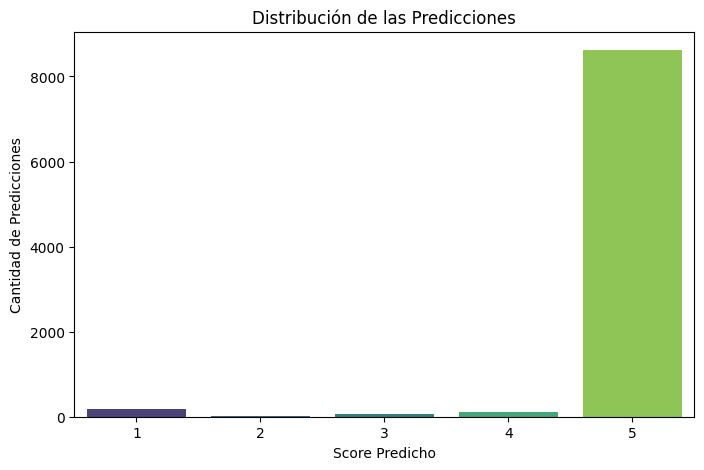

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un gráfico de la distribución de las predicciones
plt.figure(figsize=(8, 5))
sns.countplot(x=predictions, palette="viridis")

plt.title("Distribución de las Predicciones")
plt.xlabel("Score Predicho")
plt.ylabel("Cantidad de Predicciones")
plt.show()


In [74]:
pd.Series(predictions).value_counts()

5    8620
1     181
4     110
3      63
2      26
Name: count, dtype: int64

# Segunda OPCIÓN: (SUBMUESTREO DEL TRAIN)

In [ ]:
# pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [76]:
import pandas as pd
import gensim.downloader as api
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score
import json

# Descargar stopwords de NLTK
nltk.download('stopwords')
nltk.download('wordnet')

# Cargar el modelo preentrenado de FastText
model = api.load("glove-wiki-gigaword-100")

# Función para obtener el vector promedio de un texto
def get_average_vector(text, model):
    tokens = text.split()  # Tokenizamos el texto
    vectors = [model[word] for word in tokens if word in model]  # Conseguimos el vector de cada palabra
    if len(vectors) > 0:
        return sum(vectors) / len(vectors)  # Promediamos los vectores
    else:
        return np.zeros(model.vector_size)  # Si no hay vectores, devolvemos un vector de ceros

# Función para limpiar el texto
def clean_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar caracteres especiales, números y puntuación
    text = re.sub(r'[^a-záéíóúñ\s]', '', text)
    return text

# Función para eliminar stopwords y lematizar
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('spanish'))

def preprocess_text(text):
    words = text.split()
    # Eliminar stopwords y lematizar
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(cleaned_words)

# Cargar y limpiar los conjuntos de datos
train = pd.read_csv('train/train.csv', sep=';')
test = pd.read_csv('test/test.csv', sep=';')

# Llenar valores nulos en 'Summary' y 'Text' con cadenas vacías
train['Summary'] = train['Summary'].fillna('')
train['Text'] = train['Text'].fillna('')

# Crear la columna 'Review' concatenando 'Summary' y 'Text'
train['Review'] = train['Summary'] + ' ' + train['Text']

test['Summary'] = test['Summary'].fillna('')
test['Text'] = test['Text'].fillna('')
test['Review'] = test['Summary'] + ' ' + test['Text']

# Limpiar el texto en la columna 'Review'
train['Review'] = train['Review'].apply(clean_text)
test['Review'] = test['Review'].apply(clean_text)

# Aplicar la función de preprocesamiento al texto (eliminar stopwords y lematizar)
train['Review'] = train['Review'].apply(preprocess_text)
test['Review'] = test['Review'].apply(preprocess_text)

# Verifica que las columnas 'Review' se han creado correctamente
print(train.columns)  # Debería mostrar 'Review'
print(test.columns)   # Debería mostrar 'Review'

# Aplicar la función para obtener el vector promedio de las reseñas
train['Review_Vector'] = train['Review'].apply(lambda x: get_average_vector(x, model))
test['Review_Vector'] = test['Review'].apply(lambda x: get_average_vector(x, model))

# Verificar que las nuevas columnas han sido agregadas correctamente
print(train[['Review', 'Review_Vector']].head())  # Muestra las primeras filas para validar
print(test[['Review', 'Review_Vector']].head())   # Muestra las primeras filas para validar

# ---- Añadir el vectorizador TF-IDF ----

# Inicializar el vectorizador TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limitar a 5000 características

# Ajustar y transformar el texto del conjunto de entrenamiento
X_tfidf = vectorizer.fit_transform(train['Review'])

# Ver las primeras características
print(f"Dimensiones de la matriz TF-IDF: {X_tfidf.shape}")


# ---- Añadir la longitud del texto como nueva característica ----

# Crear una nueva característica 'Length' que es la longitud del texto
train['Length'] = train['Review'].apply(len)
test['Length'] = test['Review'].apply(len)

# Ver el resultado
print(train[['Review', 'Length', 'Score']].head())  # Muestra las primeras filas

# ---- Inicializar el vectorizador con n-gramas (unigrams, bigrams y trigrams) ----

# Inicializar el vectorizador con bigramas y trigramas
vectorizer_ngram = TfidfVectorizer(ngram_range=(1, 3), max_features=5000)

# Ajustar y transformar el texto del conjunto de entrenamiento
X_ngram = vectorizer_ngram.fit_transform(train['Review'])

# Ver las dimensiones de la matriz de n-gramas
print(f"Dimensiones de la matriz N-gramas: {X_ngram.shape}")


# ---- Dividir los datos en entrenamiento y validación (70%/30%) ----

# Tomar las características de TF-IDF (o de n-gramas si lo prefieres)
X = X_tfidf  # O puedes usar X_ngram

# La variable objetivo (Score)
y = train['Score']

# Dividir el conjunto de datos en train y validación (70% / 30%)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# Ver las dimensiones
print(f"Entrenamiento X: {X_train.shape}, Y: {y_train.shape}")
print(f"Validación X: {X_valid.shape}, Y: {y_valid.shape}")


# ---- Submuestreo para balancear las clases ----
from imblearn.under_sampling import RandomUnderSampler

# Crear un objeto para el submuestreo
rus = RandomUnderSampler(random_state=42)

# Ajustar y transformar los datos de entrenamiento para balancear las clases
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Ver las nuevas distribuciones de clases
print(f"Distribución de clases después del submuestreo: {y_train_resampled.value_counts()}")


# ---- Entrenamiento del modelo ----

# Inicializar el clasificador Random Forest
model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de validación
y_pred = model.predict(X_valid)

# Evaluar el modelo usando F1 Score
f1 = f1_score(y_valid, y_pred, average='weighted')  # F1 ponderado
print(f"F1 Score: {f1:.4f}")

# Ver el reporte de clasificación
print(classification_report(y_valid, y_pred))


# ---- Predicciones en el conjunto de test ----

# Preprocesar las reseñas del conjunto de test de la misma manera
test['Review'] = test['Summary'] + ' ' + test['Text']
test['Review'] = test['Review'].apply(clean_text)
test['Review'] = test['Review'].apply(preprocess_text)

# Vectorizar las reseñas del conjunto de test
X_test = vectorizer.transform(test['Review'])  # Usamos el mismo vectorizador que en el entrenamiento

# Realizar las predicciones para el test
predictions = model.predict(X_test)

# Crear el archivo JSON con las predicciones
# Convertir los valores a int (tipo nativo de Python)
predictions_dict = {k: int(v) for k, v in zip(test['Test_id'], predictions)}

# Guardar las predicciones en el archivo predictions.json
with open('predictions/predictions.json', 'w') as f:
    json.dump({"target": predictions_dict}, f, indent=4)

print("Archivo predictions.json creado exitosamente.")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jjaavviieerroperro\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jjaavviieerroperro\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Package wordnet is already up-to-date!


Index(['Score', 'Summary', 'Text', 'Review'], dtype='object')
Index(['Test_id', 'Summary', 'Text', 'Review'], dtype='object')
                                              Review  \
0  why the white tea blend i really cannot emphas...   
1  horrible quality the shipment i received had s...   
2  the jalapeno story i love the taste of jalapen...   
3  addictive these sunflower seed are incredible ...   
4  brings back memory of my mother lemon pie my s...   

                                       Review_Vector  
0  [-0.20507424, 0.36003962, 0.33213353, -0.09768...  
1  [-0.13062128, 0.32978615, 0.4286799, -0.307330...  
2  [-0.2522357, 0.34309295, 0.27317682, -0.242495...  
3  [-0.17134266, 0.3456027, 0.29976436, -0.291950...  
4  [-0.16798367, 0.28093612, 0.18388237, -0.23464...  
                                              Review  \
0  smooth this is so far my favorite kcup very ri...   
1  full bodied rich taste i recently wa in winthr...   
2  first time bonsai fantastic for your

SOBREMUESTREO CON SMOTE

In [ ]:
# pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [78]:
import pandas as pd
import gensim.downloader as api
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score
import json

# Descargar stopwords de NLTK
nltk.download('stopwords')
nltk.download('wordnet')

# Cargar el modelo preentrenado de FastText
model = api.load("glove-wiki-gigaword-100")

# Función para obtener el vector promedio de un texto
def get_average_vector(text, model):
    tokens = text.split()  # Tokenizamos el texto
    vectors = [model[word] for word in tokens if word in model]  # Conseguimos el vector de cada palabra
    if len(vectors) > 0:
        return sum(vectors) / len(vectors)  # Promediamos los vectores
    else:
        return np.zeros(model.vector_size)  # Si no hay vectores, devolvemos un vector de ceros

# Función para limpiar el texto
def clean_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar caracteres especiales, números y puntuación
    text = re.sub(r'[^a-záéíóúñ\s]', '', text)
    return text

# Función para eliminar stopwords y lematizar
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('spanish'))

def preprocess_text(text):
    words = text.split()
    # Eliminar stopwords y lematizar
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(cleaned_words)

# Cargar y limpiar los conjuntos de datos
train = pd.read_csv('train/train.csv', sep=';')
test = pd.read_csv('test/test.csv', sep=';')

# Llenar valores nulos en 'Summary' y 'Text' con cadenas vacías
train['Summary'] = train['Summary'].fillna('')
train['Text'] = train['Text'].fillna('')

# Crear la columna 'Review' concatenando 'Summary' y 'Text'
train['Review'] = train['Summary'] + ' ' + train['Text']

test['Summary'] = test['Summary'].fillna('')
test['Text'] = test['Text'].fillna('')
test['Review'] = test['Summary'] + ' ' + test['Text']

# Limpiar el texto en la columna 'Review'
train['Review'] = train['Review'].apply(clean_text)
test['Review'] = test['Review'].apply(clean_text)

# Aplicar la función de preprocesamiento al texto (eliminar stopwords y lematizar)
train['Review'] = train['Review'].apply(preprocess_text)
test['Review'] = test['Review'].apply(preprocess_text)

# Verifica que las columnas 'Review' se han creado correctamente
print(train.columns)  # Debería mostrar 'Review'
print(test.columns)   # Debería mostrar 'Review'

# Aplicar la función para obtener el vector promedio de las reseñas
train['Review_Vector'] = train['Review'].apply(lambda x: get_average_vector(x, model))
test['Review_Vector'] = test['Review'].apply(lambda x: get_average_vector(x, model))

# Verificar que las nuevas columnas han sido agregadas correctamente
print(train[['Review', 'Review_Vector']].head())  # Muestra las primeras filas para validar
print(test[['Review', 'Review_Vector']].head())   # Muestra las primeras filas para validar

# ---- Añadir el vectorizador TF-IDF ----

# Inicializar el vectorizador TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limitar a 5000 características

# Ajustar y transformar el texto del conjunto de entrenamiento
X_tfidf = vectorizer.fit_transform(train['Review'])

# Ver las primeras características
print(f"Dimensiones de la matriz TF-IDF: {X_tfidf.shape}")


# ---- Añadir la longitud del texto como nueva característica ----

# Crear una nueva característica 'Length' que es la longitud del texto
train['Length'] = train['Review'].apply(len)
test['Length'] = test['Review'].apply(len)

# Ver el resultado
print(train[['Review', 'Length', 'Score']].head())  # Muestra las primeras filas

# ---- Inicializar el vectorizador con n-gramas (unigrams, bigrams y trigrams) ----

# Inicializar el vectorizador con bigramas y trigramas
vectorizer_ngram = TfidfVectorizer(ngram_range=(1, 3), max_features=5000)

# Ajustar y transformar el texto del conjunto de entrenamiento
X_ngram = vectorizer_ngram.fit_transform(train['Review'])

# Ver las dimensiones de la matriz de n-gramas
print(f"Dimensiones de la matriz N-gramas: {X_ngram.shape}")


# ---- Dividir los datos en entrenamiento y validación (70%/30%) ----

# Tomar las características de TF-IDF (o de n-gramas si lo prefieres)
X = X_tfidf  # O puedes usar X_ngram

# La variable objetivo (Score)
y = train['Score']

# Dividir el conjunto de datos en train y validación (70% / 30%)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# Ver las dimensiones
print(f"Entrenamiento X: {X_train.shape}, Y: {y_train.shape}")
print(f"Validación X: {X_valid.shape}, Y: {y_valid.shape}")


# ---- Sobremuestreo con SMOTE para balancear las clases ----
from imblearn.over_sampling import SMOTE

# Crear el objeto para el sobremuestreo
smote = SMOTE(random_state=42)

# Ajustar y transformar los datos de entrenamiento para balancear las clases (sobremuestreo)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Ver las nuevas distribuciones de clases
print(f"Distribución de clases después del sobremuestreo: {y_train_resampled.value_counts()}")


# ---- Entrenamiento del modelo ----

# Inicializar el clasificador Random Forest
model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de validación
y_pred = model.predict(X_valid)

# Evaluar el modelo usando F1 Score
f1 = f1_score(y_valid, y_pred, average='weighted')  # F1 ponderado
print(f"F1 Score: {f1:.4f}")

# Ver el reporte de clasificación
print(classification_report(y_valid, y_pred))


# ---- Predicciones en el conjunto de test ----

# Preprocesar las reseñas del conjunto de test de la misma manera
test['Review'] = test['Summary'] + ' ' + test['Text']
test['Review'] = test['Review'].apply(clean_text)
test['Review'] = test['Review'].apply(preprocess_text)

# Vectorizar las reseñas del conjunto de test
X_test = vectorizer.transform(test['Review'])  # Usamos el mismo vectorizador que en el entrenamiento

# Realizar las predicciones para el test
predictions = model.predict(X_test)

# Crear el archivo JSON con las predicciones
# Convertir los valores a int (tipo nativo de Python)
predictions_dict = {k: int(v) for k, v in zip(test['Test_id'], predictions)}

# Guardar las predicciones en el archivo predictions.json
with open('predictions/predictions.json', 'w') as f:
    json.dump({"target": predictions_dict}, f, indent=4)

print("Archivo predictions.json creado exitosamente.")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jjaavviieerroperro\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jjaavviieerroperro\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Package wordnet is already up-to-date!


Index(['Score', 'Summary', 'Text', 'Review'], dtype='object')
Index(['Test_id', 'Summary', 'Text', 'Review'], dtype='object')
                                              Review  \
0  why the white tea blend i really cannot emphas...   
1  horrible quality the shipment i received had s...   
2  the jalapeno story i love the taste of jalapen...   
3  addictive these sunflower seed are incredible ...   
4  brings back memory of my mother lemon pie my s...   

                                       Review_Vector  
0  [-0.20507424, 0.36003962, 0.33213353, -0.09768...  
1  [-0.13062128, 0.32978615, 0.4286799, -0.307330...  
2  [-0.2522357, 0.34309295, 0.27317682, -0.242495...  
3  [-0.17134266, 0.3456027, 0.29976436, -0.291950...  
4  [-0.16798367, 0.28093612, 0.18388237, -0.23464...  
                                              Review  \
0  smooth this is so far my favorite kcup very ri...   
1  full bodied rich taste i recently wa in winthr...   
2  first time bonsai fantastic for your

# XGBOOST   554/900 pts (simple)

In [86]:
import pandas as pd
import gensim.downloader as api
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
import json
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Descargar stopwords de NLTK
nltk.download('stopwords')
nltk.download('wordnet')

# Cargar el modelo preentrenado de FastText
model = api.load("glove-wiki-gigaword-100")

# Función para obtener el vector promedio de un texto
def get_average_vector(text, model):
    tokens = text.split()  # Tokenizamos el texto
    vectors = [model[word] for word in tokens if word in model]  # Conseguimos el vector de cada palabra
    if len(vectors) > 0:
        return sum(vectors) / len(vectors)  # Promediamos los vectores
    else:
        return np.zeros(model.vector_size)  # Si no hay vectores, devolvemos un vector de ceros

# Función para limpiar el texto
def clean_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar caracteres especiales, números y puntuación
    text = re.sub(r'[^a-z\s]', '', text)  # Sólo letras y espacios
    return text

# Función para eliminar stopwords y lematizar
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))  # Usamos stopwords en inglés

def preprocess_text(text):
    words = text.split()
    # Eliminar stopwords y lematizar
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(cleaned_words)

# Cargar y limpiar los conjuntos de datos
train = pd.read_csv('train/train.csv', sep=';')
test = pd.read_csv('test/test.csv', sep=';')

# Llenar valores nulos en 'Summary' y 'Text' con cadenas vacías
train['Summary'] = train['Summary'].fillna('')
train['Text'] = train['Text'].fillna('')

# Crear la columna 'Review' concatenando 'Summary' y 'Text'
train['Review'] = train['Summary'] + ' ' + train['Text']

test['Summary'] = test['Summary'].fillna('')
test['Text'] = test['Text'].fillna('')
test['Review'] = test['Summary'] + ' ' + test['Text']

# Limpiar el texto en la columna 'Review'
train['Review'] = train['Review'].apply(clean_text)
test['Review'] = test['Review'].apply(clean_text)

# Aplicar la función de preprocesamiento al texto (eliminar stopwords y lematizar)
train['Review'] = train['Review'].apply(preprocess_text)
test['Review'] = test['Review'].apply(preprocess_text)

# Verifica que las columnas 'Review' se han creado correctamente
print(train.columns)  # Debería mostrar 'Review'
print(test.columns)   # Debería mostrar 'Review'

# Aplicar la función para obtener el vector promedio de las reseñas
train['Review_Vector'] = train['Review'].apply(lambda x: get_average_vector(x, model))
test['Review_Vector'] = test['Review'].apply(lambda x: get_average_vector(x, model))

# Verificar que las nuevas columnas han sido agregadas correctamente
print(train[['Review', 'Review_Vector']].head())  # Muestra las primeras filas para validar
print(test[['Review', 'Review_Vector']].head())   # Muestra las primeras filas para validar

# ---- Añadir el vectorizador TF-IDF ----

# Inicializar el vectorizador TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limitar a 5000 características

# Ajustar y transformar el texto del conjunto de entrenamiento
X_tfidf = vectorizer.fit_transform(train['Review'])

# Ver las primeras características
print(f"Dimensiones de la matriz TF-IDF: {X_tfidf.shape}")

# ---- Añadir la longitud del texto como nueva característica ----

# Crear una nueva característica 'Length' que es la longitud del texto
train['Length'] = train['Review'].apply(len)
test['Length'] = test['Review'].apply(len)

# Ver el resultado
print(train[['Review', 'Length', 'Score']].head())  # Muestra las primeras filas

# ---- Inicializar el vectorizador con n-gramas (unigrams, bigrams y trigrams) ----

# Inicializar el vectorizador con bigramas y trigramas
vectorizer_ngram = TfidfVectorizer(ngram_range=(1, 3), max_features=5000)

# Ajustar y transformar el texto del conjunto de entrenamiento
X_ngram = vectorizer_ngram.fit_transform(train['Review'])

# Ver las dimensiones de la matriz de n-gramas
print(f"Dimensiones de la matriz N-gramas: {X_ngram.shape}")

# ---- Dividir los datos en entrenamiento y validación (70%/30%) ----

# Tomar las características de TF-IDF (o de n-gramas si lo prefieres)
X = X_tfidf  # O puedes usar X_ngram

# La variable objetivo (Score)
y = train['Score']

# Dividir el conjunto de datos en train y validación (70% / 30%)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# Ver las dimensiones
print(f"Entrenamiento X: {X_train.shape}, Y: {y_train.shape}")
print(f"Validación X: {X_valid.shape}, Y: {y_valid.shape}")

# ---- Codificación de etiquetas para XGBoost ----

# Codificar las clases (si comienzan desde 1 en vez de 0)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_valid_encoded = label_encoder.transform(y_valid)

# ---- Entrenamiento del modelo XGBoost ----

# Inicializar el clasificador XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
xgb_model.fit(X_train, y_train_encoded)

# Realizar predicciones en el conjunto de validación
y_pred = xgb_model.predict(X_valid)

# Convertir las predicciones codificadas a las clases originales
y_pred = label_encoder.inverse_transform(y_pred)

# Evaluar el modelo usando F1 Score
f1 = f1_score(y_valid, y_pred, average='weighted')  # F1 ponderado
print(f"F1 Score de XGBoost: {f1:.4f}")

# Mostrar el reporte de clasificación
print(classification_report(y_valid, y_pred))

# ---- Predicciones en el conjunto de test ----

# Preprocesar las reseñas del conjunto de test de la misma manera
test['Review'] = test['Summary'] + ' ' + test['Text']
test['Review'] = test['Review'].apply(clean_text)
test['Review'] = test['Review'].apply(preprocess_text)

# Vectorizar las reseñas del conjunto de test
X_test = vectorizer.transform(test['Review'])  # Usamos el mismo vectorizador que en el entrenamiento

# Realizar las predicciones para el test
predictions = xgb_model.predict(X_test)

# Convertir las predicciones codificadas a las clases originales
predictions = label_encoder.inverse_transform(predictions)

# Crear el archivo JSON con las predicciones
# Convertir los valores a int (tipo nativo de Python)
predictions_dict = {k: int(v) for k, v in zip(test['Test_id'], predictions)}

# Guardar las predicciones en el archivo predictions.json
with open('predictions/predictions.json', 'w') as f:
    json.dump({"target": predictions_dict}, f, indent=4)

print("Archivo predictions.json creado exitosamente.")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jjaavviieerroperro\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jjaavviieerroperro\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Package wordnet is already up-to-date!


Index(['Score', 'Summary', 'Text', 'Review'], dtype='object')
Index(['Test_id', 'Summary', 'Text', 'Review'], dtype='object')
                                              Review  \
0  white tea blend really cannot emphasize disapp...   
1  horrible quality shipment received soooooo muc...   
2  jalapeno story love taste jalapeno theyre hot ...   
3  addictive sunflower seed incredible hot one wo...   
4  brings back memory mother lemon pie sister dis...   

                                       Review_Vector  
0  [-0.26025024, 0.46440136, 0.19910002, -0.06854...  
1  [-0.16725275, 0.4211984, 0.34011847, -0.216227...  
2  [-0.31166786, 0.4893486, -0.0036650002, -0.144...  
3  [-0.015326247, 0.305886, 0.478545, -0.10725289...  
4  [-0.3007989, 0.34888992, -0.02588211, -0.11103...  
                                              Review  \
0           smooth far favorite kcup rich yet smooth   
1  full bodied rich taste recently winthrop vacat...   
2     first time bonsai fantastic first

C:\Users\Jjaavviieerroperro\AppData\Local\Temp\ipykernel_15456\879684569.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=predictions, palette="viridis")


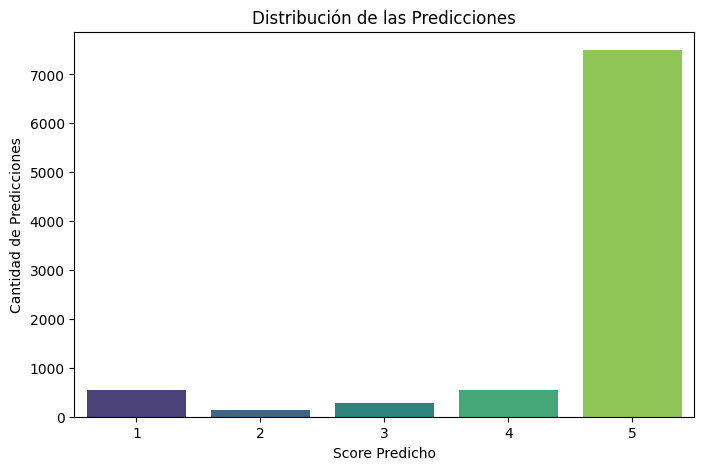

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un gráfico de la distribución de las predicciones
plt.figure(figsize=(8, 5))
sns.countplot(x=predictions, palette="viridis")

plt.title("Distribución de las Predicciones")
plt.xlabel("Score Predicho")
plt.ylabel("Cantidad de Predicciones")
plt.show()


In [82]:
pd.Series(predictions).value_counts()

5    7499
1     553
4     540
3     272
2     136
Name: count, dtype: int64

# XGBooost TUNEADO con SOBRE MUESTREO: 546/900 pts

In [83]:
import pandas as pd
import gensim.downloader as api
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
import json
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE  # Importar SMOTE para el sobremuestreo

# Descargar stopwords de NLTK
nltk.download('stopwords')
nltk.download('wordnet')

# Cargar el modelo preentrenado de FastText
model = api.load("glove-wiki-gigaword-100")

# Función para obtener el vector promedio de un texto
def get_average_vector(text, model):
    tokens = text.split()  # Tokenizamos el texto
    vectors = [model[word] for word in tokens if word in model]  # Conseguimos el vector de cada palabra
    if len(vectors) > 0:
        return sum(vectors) / len(vectors)  # Promediamos los vectores
    else:
        return np.zeros(model.vector_size)  # Si no hay vectores, devolvemos un vector de ceros

# Función para limpiar el texto
def clean_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar caracteres especiales, números y puntuación
    text = re.sub(r'[^a-záéíóúñ\s]', '', text)
    return text

# Función para eliminar stopwords y lematizar
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('spanish'))

def preprocess_text(text):
    words = text.split()
    # Eliminar stopwords y lematizar
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(cleaned_words)

# Cargar y limpiar los conjuntos de datos
train = pd.read_csv('train/train.csv', sep=';')
test = pd.read_csv('test/test.csv', sep=';')

# Llenar valores nulos en 'Summary' y 'Text' con cadenas vacías
train['Summary'] = train['Summary'].fillna('')
train['Text'] = train['Text'].fillna('')

# Crear la columna 'Review' concatenando 'Summary' y 'Text'
train['Review'] = train['Summary'] + ' ' + train['Text']

test['Summary'] = test['Summary'].fillna('')
test['Text'] = test['Text'].fillna('')
test['Review'] = test['Summary'] + ' ' + test['Text']

# Limpiar el texto en la columna 'Review'
train['Review'] = train['Review'].apply(clean_text)
test['Review'] = test['Review'].apply(clean_text)

# Aplicar la función de preprocesamiento al texto (eliminar stopwords y lematizar)
train['Review'] = train['Review'].apply(preprocess_text)
test['Review'] = test['Review'].apply(preprocess_text)

# Verifica que las columnas 'Review' se han creado correctamente
print(train.columns)  # Debería mostrar 'Review'
print(test.columns)   # Debería mostrar 'Review'

# Aplicar la función para obtener el vector promedio de las reseñas
train['Review_Vector'] = train['Review'].apply(lambda x: get_average_vector(x, model))
test['Review_Vector'] = test['Review'].apply(lambda x: get_average_vector(x, model))

# Verificar que las nuevas columnas han sido agregadas correctamente
print(train[['Review', 'Review_Vector']].head())  # Muestra las primeras filas para validar
print(test[['Review', 'Review_Vector']].head())   # Muestra las primeras filas para validar

# ---- Añadir el vectorizador TF-IDF ----

# Inicializar el vectorizador TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limitar a 5000 características

# Ajustar y transformar el texto del conjunto de entrenamiento
X_tfidf = vectorizer.fit_transform(train['Review'])

# Ver las primeras características
print(f"Dimensiones de la matriz TF-IDF: {X_tfidf.shape}")

# ---- Añadir la longitud del texto como nueva característica ----

# Crear una nueva característica 'Length' que es la longitud del texto
train['Length'] = train['Review'].apply(len)
test['Length'] = test['Review'].apply(len)

# Ver el resultado
print(train[['Review', 'Length', 'Score']].head())  # Muestra las primeras filas

# ---- Inicializar el vectorizador con n-gramas (unigrams, bigrams y trigrams) ----

# Inicializar el vectorizador con bigramas y trigramas
vectorizer_ngram = TfidfVectorizer(ngram_range=(1, 3), max_features=5000)

# Ajustar y transformar el texto del conjunto de entrenamiento
X_ngram = vectorizer_ngram.fit_transform(train['Review'])

# Ver las dimensiones de la matriz de n-gramas
print(f"Dimensiones de la matriz N-gramas: {X_ngram.shape}")

# ---- Dividir los datos en entrenamiento y validación (70%/30%) ----

# Tomar las características de TF-IDF (o de n-gramas si lo prefieres)
X = X_tfidf  # O puedes usar X_ngram

# La variable objetivo (Score)
y = train['Score']

# Dividir el conjunto de datos en train y validación (70% / 30%)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# Ver las dimensiones
print(f"Entrenamiento X: {X_train.shape}, Y: {y_train.shape}")
print(f"Validación X: {X_valid.shape}, Y: {y_valid.shape}")

# ---- Codificación de etiquetas para XGBoost ----

# Codificar las clases (si comienzan desde 1 en vez de 0)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_valid_encoded = label_encoder.transform(y_valid)

# ---- Aplicar SMOTE para sobremuestreo ----

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train_encoded)

# Ver las dimensiones después del sobremuestreo
print(f"Dimensiones de X_train después del sobremuestreo: {X_train_resampled.shape}")
print(f"Distribución de clases después del sobremuestreo: {np.bincount(y_train_resampled)}")

# ---- Ajuste de scale_pos_weight para el desbalance ----

# Calcular la relación entre las clases mayoritaria y minoritaria para scale_pos_weight
class_weight_ratio = len(y_train) / (len(np.unique(y_train)) * np.bincount(y_train_encoded))
print(f"Ratio de clases para scale_pos_weight: {class_weight_ratio}")

# ---- Entrenamiento del modelo XGBoost ----

# Inicializar el clasificador XGBoost con el parámetro scale_pos_weight
xgb_model = xgb.XGBClassifier(scale_pos_weight=class_weight_ratio, random_state=42)

# Entrenar el modelo con los datos de entrenamiento resampleados
xgb_model.fit(X_train_resampled, y_train_resampled)

# Realizar predicciones en el conjunto de validación
y_pred = xgb_model.predict(X_valid)

# Convertir las predicciones codificadas a las clases originales
y_pred = label_encoder.inverse_transform(y_pred)

# Evaluar el modelo usando F1 Score
f1 = f1_score(y_valid, y_pred, average='weighted')  # F1 ponderado
print(f"F1 Score de XGBoost después de sobremuestreo: {f1:.4f}")

# Mostrar el reporte de clasificación
print(classification_report(y_valid, y_pred))

# ---- Predicciones en el conjunto de test ----

# Preprocesar las reseñas del conjunto de test de la misma manera
test['Review'] = test['Summary'] + ' ' + test['Text']
test['Review'] = test['Review'].apply(clean_text)
test['Review'] = test['Review'].apply(preprocess_text)

# Vectorizar las reseñas del conjunto de test
X_test = vectorizer.transform(test['Review'])  # Usamos el mismo vectorizador que en el entrenamiento

# Realizar las predicciones para el test
predictions = xgb_model.predict(X_test)

# Convertir las predicciones codificadas a las clases originales
predictions = label_encoder.inverse_transform(predictions)

# Crear el archivo JSON con las predicciones
# Convertir los valores a int (tipo nativo de Python)
predictions_dict = {k: int(v) for k, v in zip(test['Test_id'], predictions)}

# Guardar las predicciones en el archivo predictions.json
with open('predictions/predictions.json', 'w') as f:
    json.dump({"target": predictions_dict}, f, indent=4)

print("Archivo predictions.json creado exitosamente.")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jjaavviieerroperro\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jjaavviieerroperro\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Package wordnet is already up-to-date!


Index(['Score', 'Summary', 'Text', 'Review'], dtype='object')
Index(['Test_id', 'Summary', 'Text', 'Review'], dtype='object')
                                              Review  \
0  why the white tea blend i really cannot emphas...   
1  horrible quality the shipment i received had s...   
2  the jalapeno story i love the taste of jalapen...   
3  addictive these sunflower seed are incredible ...   
4  brings back memory of my mother lemon pie my s...   

                                       Review_Vector  
0  [-0.20507424, 0.36003962, 0.33213353, -0.09768...  
1  [-0.13062128, 0.32978615, 0.4286799, -0.307330...  
2  [-0.2522357, 0.34309295, 0.27317682, -0.242495...  
3  [-0.17134266, 0.3456027, 0.29976436, -0.291950...  
4  [-0.16798367, 0.28093612, 0.18388237, -0.23464...  
                                              Review  \
0  smooth this is so far my favorite kcup very ri...   
1  full bodied rich taste i recently wa in winthr...   
2  first time bonsai fantastic for your

c:\Users\Jjaavviieerroperro\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:06:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


F1 Score de XGBoost después de sobremuestreo: 0.6269
              precision    recall  f1-score   support

           1       0.53      0.41      0.46       551
           2       0.32      0.17      0.22       335
           3       0.35      0.21      0.27       433
           4       0.37      0.18      0.24       943
           5       0.74      0.91      0.81      4038

    accuracy                           0.67      6300
   macro avg       0.46      0.38      0.40      6300
weighted avg       0.61      0.67      0.63      6300

Archivo predictions.json creado exitosamente.


# CATBOOST

In [84]:
import pandas as pd
import gensim.downloader as api
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
import json
from catboost import CatBoostClassifier

# Descargar stopwords de NLTK
nltk.download('stopwords')
nltk.download('wordnet')

# Cargar el modelo preentrenado de FastText
model = api.load("glove-wiki-gigaword-100")

# Función para obtener el vector promedio de un texto
def get_average_vector(text, model):
    tokens = text.split()  # Tokenizamos el texto
    vectors = [model[word] for word in tokens if word in model]  # Conseguimos el vector de cada palabra
    if len(vectors) > 0:
        return sum(vectors) / len(vectors)  # Promediamos los vectores
    else:
        return np.zeros(model.vector_size)  # Si no hay vectores, devolvemos un vector de ceros

# Función para limpiar el texto
def clean_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar caracteres especiales, números y puntuación
    text = re.sub(r'[^a-záéíóúñ\s]', '', text)
    return text

# Función para eliminar stopwords y lematizar
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('spanish'))

def preprocess_text(text):
    words = text.split()
    # Eliminar stopwords y lematizar
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(cleaned_words)

# Cargar y limpiar los conjuntos de datos
train = pd.read_csv('train/train.csv', sep=';')
test = pd.read_csv('test/test.csv', sep=';')

# Llenar valores nulos en 'Summary' y 'Text' con cadenas vacías
train['Summary'] = train['Summary'].fillna('')
train['Text'] = train['Text'].fillna('')

# Crear la columna 'Review' concatenando 'Summary' y 'Text'
train['Review'] = train['Summary'] + ' ' + train['Text']

test['Summary'] = test['Summary'].fillna('')
test['Text'] = test['Text'].fillna('')
test['Review'] = test['Summary'] + ' ' + test['Text']

# Limpiar el texto en la columna 'Review'
train['Review'] = train['Review'].apply(clean_text)
test['Review'] = test['Review'].apply(clean_text)

# Aplicar la función de preprocesamiento al texto (eliminar stopwords y lematizar)
train['Review'] = train['Review'].apply(preprocess_text)
test['Review'] = test['Review'].apply(preprocess_text)

# Verifica que las columnas 'Review' se han creado correctamente
print(train.columns)  # Debería mostrar 'Review'
print(test.columns)   # Debería mostrar 'Review'

# Aplicar la función para obtener el vector promedio de las reseñas
train['Review_Vector'] = train['Review'].apply(lambda x: get_average_vector(x, model))
test['Review_Vector'] = test['Review'].apply(lambda x: get_average_vector(x, model))

# Verificar que las nuevas columnas han sido agregadas correctamente
print(train[['Review', 'Review_Vector']].head())  # Muestra las primeras filas para validar
print(test[['Review', 'Review_Vector']].head())   # Muestra las primeras filas para validar

# ---- Añadir el vectorizador TF-IDF ----

# Inicializar el vectorizador TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limitar a 5000 características

# Ajustar y transformar el texto del conjunto de entrenamiento
X_tfidf = vectorizer.fit_transform(train['Review'])

# Ver las primeras características
print(f"Dimensiones de la matriz TF-IDF: {X_tfidf.shape}")


# ---- Añadir la longitud del texto como nueva característica ----

# Crear una nueva característica 'Length' que es la longitud del texto
train['Length'] = train['Review'].apply(len)
test['Length'] = test['Review'].apply(len)

# Ver el resultado
print(train[['Review', 'Length', 'Score']].head())  # Muestra las primeras filas

# ---- Inicializar el vectorizador con n-gramas (unigrams, bigrams y trigrams) ----

# Inicializar el vectorizador con bigramas y trigramas
vectorizer_ngram = TfidfVectorizer(ngram_range=(1, 3), max_features=5000)

# Ajustar y transformar el texto del conjunto de entrenamiento
X_ngram = vectorizer_ngram.fit_transform(train['Review'])

# Ver las dimensiones de la matriz de n-gramas
print(f"Dimensiones de la matriz N-gramas: {X_ngram.shape}")


# ---- Dividir los datos en entrenamiento y validación (70%/30%) ----

# Tomar las características de TF-IDF (o de n-gramas si lo prefieres)
X = X_tfidf  # O puedes usar X_ngram

# La variable objetivo (Score)
y = train['Score']

# Dividir el conjunto de datos en train y validación (70% / 30%)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# Ver las dimensiones
print(f"Entrenamiento X: {X_train.shape}, Y: {y_train.shape}")
print(f"Validación X: {X_valid.shape}, Y: {y_valid.shape}")


# ---- Entrenamiento del modelo con CatBoost ----

# Inicializar el clasificador CatBoost
catboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=7, random_state=42, verbose=200)

# Entrenar el modelo con los datos de entrenamiento
catboost_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de validación
y_pred_catboost = catboost_model.predict(X_valid)

# Evaluar el modelo usando F1 Score
f1_catboost = f1_score(y_valid, y_pred_catboost, average='weighted')  # F1 ponderado
print(f"F1 Score con CatBoost: {f1_catboost:.4f}")

# Ver el reporte de clasificación
print(classification_report(y_valid, y_pred_catboost))


# ---- Predicciones en el conjunto de test ----

# Preprocesar las reseñas del conjunto de test de la misma manera
test['Review'] = test['Summary'] + ' ' + test['Text']
test['Review'] = test['Review'].apply(clean_text)
test['Review'] = test['Review'].apply(preprocess_text)

# Vectorizar las reseñas del conjunto de test
X_test = vectorizer.transform(test['Review'])  # Usamos el mismo vectorizador que en el entrenamiento

# Realizar las predicciones para el test
predictions = catboost_model.predict(X_test)

# Crear el archivo JSON con las predicciones
# Convertir los valores a int (tipo nativo de Python)
predictions_dict = {k: int(v) for k, v in zip(test['Test_id'], predictions)}

# Guardar las predicciones en el archivo predictions.json
with open('predictions/predictions.json', 'w') as f:
    json.dump({"target": predictions_dict}, f, indent=4)

print("Archivo predictions.json creado exitosamente.")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jjaavviieerroperro\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jjaavviieerroperro\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Package wordnet is already up-to-date!


Index(['Score', 'Summary', 'Text', 'Review'], dtype='object')
Index(['Test_id', 'Summary', 'Text', 'Review'], dtype='object')
                                              Review  \
0  why the white tea blend i really cannot emphas...   
1  horrible quality the shipment i received had s...   
2  the jalapeno story i love the taste of jalapen...   
3  addictive these sunflower seed are incredible ...   
4  brings back memory of my mother lemon pie my s...   

                                       Review_Vector  
0  [-0.20507424, 0.36003962, 0.33213353, -0.09768...  
1  [-0.13062128, 0.32978615, 0.4286799, -0.307330...  
2  [-0.2522357, 0.34309295, 0.27317682, -0.242495...  
3  [-0.17134266, 0.3456027, 0.29976436, -0.291950...  
4  [-0.16798367, 0.28093612, 0.18388237, -0.23464...  
                                              Review  \
0  smooth this is so far my favorite kcup very ri...   
1  full bodied rich taste i recently wa in winthr...   
2  first time bonsai fantastic for your

KeyboardInterrupt: 

# LightGBM   562/900 pts


In [87]:
import pandas as pd
import gensim.downloader as api
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
import json
import lightgbm as lgb

# Descargar stopwords de NLTK
nltk.download('stopwords')
nltk.download('wordnet')

# Cargar el modelo preentrenado de FastText
model = api.load("glove-wiki-gigaword-100")

# Función para obtener el vector promedio de un texto
def get_average_vector(text, model):
    tokens = text.split()  # Tokenizamos el texto
    vectors = [model[word] for word in tokens if word in model]  # Conseguimos el vector de cada palabra
    if len(vectors) > 0:
        return sum(vectors) / len(vectors)  # Promediamos los vectores
    else:
        return np.zeros(model.vector_size)  # Si no hay vectores, devolvemos un vector de ceros

# Función para limpiar el texto
def clean_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar caracteres especiales, números y puntuación
    text = re.sub(r'[^a-z\s]', '', text)  # Sólo letras y espacios
    return text

# Función para eliminar stopwords y lematizar
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))  # Usamos stopwords en inglés

def preprocess_text(text):
    words = text.split()
    # Eliminar stopwords y lematizar
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(cleaned_words)

# Cargar y limpiar los conjuntos de datos
train = pd.read_csv('train/train.csv', sep=';')
test = pd.read_csv('test/test.csv', sep=';')

# Llenar valores nulos en 'Summary' y 'Text' con cadenas vacías
train['Summary'] = train['Summary'].fillna('')
train['Text'] = train['Text'].fillna('')

# Crear la columna 'Review' concatenando 'Summary' y 'Text'
train['Review'] = train['Summary'] + ' ' + train['Text']

test['Summary'] = test['Summary'].fillna('')
test['Text'] = test['Text'].fillna('')
test['Review'] = test['Summary'] + ' ' + test['Text']

# Limpiar el texto en la columna 'Review'
train['Review'] = train['Review'].apply(clean_text)
test['Review'] = test['Review'].apply(clean_text)

# Aplicar la función de preprocesamiento al texto (eliminar stopwords y lematizar)
train['Review'] = train['Review'].apply(preprocess_text)
test['Review'] = test['Review'].apply(preprocess_text)

# Verifica que las columnas 'Review' se han creado correctamente
print(train.columns)  # Debería mostrar 'Review'
print(test.columns)   # Debería mostrar 'Review'

# Aplicar la función para obtener el vector promedio de las reseñas
train['Review_Vector'] = train['Review'].apply(lambda x: get_average_vector(x, model))
test['Review_Vector'] = test['Review'].apply(lambda x: get_average_vector(x, model))

# Verificar que las nuevas columnas han sido agregadas correctamente
print(train[['Review', 'Review_Vector']].head())  # Muestra las primeras filas para validar
print(test[['Review', 'Review_Vector']].head())   # Muestra las primeras filas para validar

# ---- Añadir el vectorizador TF-IDF ----

# Inicializar el vectorizador TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limitar a 5000 características

# Ajustar y transformar el texto del conjunto de entrenamiento
X_tfidf = vectorizer.fit_transform(train['Review'])

# Ver las primeras características
print(f"Dimensiones de la matriz TF-IDF: {X_tfidf.shape}")


# ---- Añadir la longitud del texto como nueva característica ----

# Crear una nueva característica 'Length' que es la longitud del texto
train['Length'] = train['Review'].apply(len)
test['Length'] = test['Review'].apply(len)

# Ver el resultado
print(train[['Review', 'Length', 'Score']].head())  # Muestra las primeras filas

# ---- Inicializar el vectorizador con n-gramas (unigrams, bigrams y trigrams) ----

# Inicializar el vectorizador con bigramas y trigramas
vectorizer_ngram = TfidfVectorizer(ngram_range=(1, 3), max_features=5000)

# Ajustar y transformar el texto del conjunto de entrenamiento
X_ngram = vectorizer_ngram.fit_transform(train['Review'])

# Ver las dimensiones de la matriz de n-gramas
print(f"Dimensiones de la matriz N-gramas: {X_ngram.shape}")


# ---- Dividir los datos en entrenamiento y validación (70%/30%) ----

# Tomar las características de TF-IDF (o de n-gramas si lo prefieres)
X = X_tfidf  # O puedes usar X_ngram

# La variable objetivo (Score)
y = train['Score']

# Dividir el conjunto de datos en train y validación (70% / 30%)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# Ver las dimensiones
print(f"Entrenamiento X: {X_train.shape}, Y: {y_train.shape}")
print(f"Validación X: {X_valid.shape}, Y: {y_valid.shape}")


# ---- Entrenamiento del modelo con LightGBM ----

# Inicializar el clasificador LGBM
lgbm_model = lgb.LGBMClassifier(objective='multiclass', num_class=5, learning_rate=0.05, n_estimators=1000, max_depth=7, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
lgbm_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de validación
y_pred_lgbm = lgbm_model.predict(X_valid)

# Evaluar el modelo usando F1 Score
f1_lgbm = f1_score(y_valid, y_pred_lgbm, average='weighted')  # F1 ponderado
print(f"F1 Score con LGBM: {f1_lgbm:.4f}")

# Ver el reporte de clasificación
print(classification_report(y_valid, y_pred_lgbm))


# ---- Predicciones en el conjunto de test ----

# Preprocesar las reseñas del conjunto de test de la misma manera
test['Review'] = test['Summary'] + ' ' + test['Text']
test['Review'] = test['Review'].apply(clean_text)
test['Review'] = test['Review'].apply(preprocess_text)

# Vectorizar las reseñas del conjunto de test
X_test = vectorizer.transform(test['Review'])  # Usamos el mismo vectorizador que en el entrenamiento

# Realizar las predicciones para el test
predictions = lgbm_model.predict(X_test)

# Crear el archivo JSON con las predicciones
# Convertir los valores a int (tipo nativo de Python)
predictions_dict = {k: int(v) for k, v in zip(test['Test_id'], predictions)}

# Guardar las predicciones en el archivo predictions.json
with open('predictions/predictions.json', 'w') as f:
    json.dump({"target": predictions_dict}, f, indent=4)

print("Archivo predictions.json creado exitosamente.")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jjaavviieerroperro\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jjaavviieerroperro\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Package wordnet is already up-to-date!


Index(['Score', 'Summary', 'Text', 'Review'], dtype='object')
Index(['Test_id', 'Summary', 'Text', 'Review'], dtype='object')
                                              Review  \
0  white tea blend really cannot emphasize disapp...   
1  horrible quality shipment received soooooo muc...   
2  jalapeno story love taste jalapeno theyre hot ...   
3  addictive sunflower seed incredible hot one wo...   
4  brings back memory mother lemon pie sister dis...   

                                       Review_Vector  
0  [-0.26025024, 0.46440136, 0.19910002, -0.06854...  
1  [-0.16725275, 0.4211984, 0.34011847, -0.216227...  
2  [-0.31166786, 0.4893486, -0.0036650002, -0.144...  
3  [-0.015326247, 0.305886, 0.478545, -0.10725289...  
4  [-0.3007989, 0.34888992, -0.02588211, -0.11103...  
                                              Review  \
0           smooth far favorite kcup rich yet smooth   
1  full bodied rich taste recently winthrop vacat...   
2     first time bonsai fantastic first

# Añadimos columna de sentimiento al modelo LGBM

In [89]:
pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   --------------------------------------- 624.3/624.3 kB 22.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [90]:
import pandas as pd
import gensim.downloader as api
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
import json
import lightgbm as lgb
from textblob import TextBlob  # Importar TextBlob para análisis de sentimiento

# Descargar stopwords de NLTK
nltk.download('stopwords')
nltk.download('wordnet')

# Cargar el modelo preentrenado de FastText
model = api.load("glove-wiki-gigaword-100")

# Función para obtener el vector promedio de un texto
def get_average_vector(text, model):
    tokens = text.split()  # Tokenizamos el texto
    vectors = [model[word] for word in tokens if word in model]  # Conseguimos el vector de cada palabra
    if len(vectors) > 0:
        return sum(vectors) / len(vectors)  # Promediamos los vectores
    else:
        return np.zeros(model.vector_size)  # Si no hay vectores, devolvemos un vector de ceros

# Función para limpiar el texto
def clean_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar caracteres especiales, números y puntuación
    text = re.sub(r'[^a-z\s]', '', text)  # Sólo letras y espacios
    return text

# Función para eliminar stopwords y lematizar
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))  # Usamos stopwords en inglés

def preprocess_text(text):
    words = text.split()
    # Eliminar stopwords y lematizar
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(cleaned_words)

# Función para obtener el análisis de sentimiento
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # Un valor entre -1 (negativo) y 1 (positivo)

# Cargar y limpiar los conjuntos de datos
train = pd.read_csv('train/train.csv', sep=';')
test = pd.read_csv('test/test.csv', sep=';')

# Llenar valores nulos en 'Summary' y 'Text' con cadenas vacías
train['Summary'] = train['Summary'].fillna('')
train['Text'] = train['Text'].fillna('')

# Crear la columna 'Review' concatenando 'Summary' y 'Text'
train['Review'] = train['Summary'] + ' ' + train['Text']

test['Summary'] = test['Summary'].fillna('')
test['Text'] = test['Text'].fillna('')
test['Review'] = test['Summary'] + ' ' + test['Text']

# Limpiar el texto en la columna 'Review'
train['Review'] = train['Review'].apply(clean_text)
test['Review'] = test['Review'].apply(clean_text)

# Aplicar la función de preprocesamiento al texto (eliminar stopwords y lematizar)
train['Review'] = train['Review'].apply(preprocess_text)
test['Review'] = test['Review'].apply(preprocess_text)

# Añadir la columna de análisis de sentimiento (polaridad)
train['Sentiment'] = train['Review'].apply(get_sentiment)
test['Sentiment'] = test['Review'].apply(get_sentiment)

# Verifica que las columnas 'Review' y 'Sentiment' se han creado correctamente
print(train.columns)  # Debería mostrar 'Review' y 'Sentiment'
print(test.columns)   # Debería mostrar 'Review' y 'Sentiment'

# Aplicar la función para obtener el vector promedio de las reseñas
train['Review_Vector'] = train['Review'].apply(lambda x: get_average_vector(x, model))
test['Review_Vector'] = test['Review'].apply(lambda x: get_average_vector(x, model))

# Verificar que las nuevas columnas han sido agregadas correctamente
print(train[['Review', 'Review_Vector', 'Sentiment']].head())  # Muestra las primeras filas para validar
print(test[['Review', 'Review_Vector', 'Sentiment']].head())   # Muestra las primeras filas para validar

# ---- Añadir el vectorizador TF-IDF ----

# Inicializar el vectorizador TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limitar a 5000 características

# Ajustar y transformar el texto del conjunto de entrenamiento
X_tfidf = vectorizer.fit_transform(train['Review'])

# Ver las primeras características
print(f"Dimensiones de la matriz TF-IDF: {X_tfidf.shape}")

# ---- Añadir la longitud del texto como nueva característica ----

# Crear una nueva característica 'Length' que es la longitud del texto
train['Length'] = train['Review'].apply(len)
test['Length'] = test['Review'].apply(len)

# Ver el resultado
print(train[['Review', 'Length', 'Sentiment']].head())  # Muestra las primeras filas

# ---- Inicializar el vectorizador con n-gramas (unigrams, bigrams y trigrams) ----

# Inicializar el vectorizador con bigramas y trigramas
vectorizer_ngram = TfidfVectorizer(ngram_range=(1, 3), max_features=5000)

# Ajustar y transformar el texto del conjunto de entrenamiento
X_ngram = vectorizer_ngram.fit_transform(train['Review'])

# Ver las dimensiones de la matriz de n-gramas
print(f"Dimensiones de la matriz N-gramas: {X_ngram.shape}")

# ---- Dividir los datos en entrenamiento y validación (70%/30%) ----

# Tomar las características de TF-IDF (o de n-gramas si lo prefieres)
X = X_tfidf  # O puedes usar X_ngram

# La variable objetivo (Score)
y = train['Score']

# Dividir el conjunto de datos en train y validación (70% / 30%)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# Ver las dimensiones
print(f"Entrenamiento X: {X_train.shape}, Y: {y_train.shape}")
print(f"Validación X: {X_valid.shape}, Y: {y_valid.shape}")

# ---- Entrenamiento del modelo con LightGBM ----

# Inicializar el clasificador LGBM
lgbm_model = lgb.LGBMClassifier(objective='multiclass', num_class=5, learning_rate=0.05, n_estimators=1000, max_depth=7, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
lgbm_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de validación
y_pred_lgbm = lgbm_model.predict(X_valid)

# Evaluar el modelo usando F1 Score
f1_lgbm = f1_score(y_valid, y_pred_lgbm, average='weighted')  # F1 ponderado
print(f"F1 Score con LGBM: {f1_lgbm:.4f}")

# Ver el reporte de clasificación
print(classification_report(y_valid, y_pred_lgbm))

# ---- Predicciones en el conjunto de test ----

# Preprocesar las reseñas del conjunto de test de la misma manera
test['Review'] = test['Summary'] + ' ' + test['Text']
test['Review'] = test['Review'].apply(clean_text)
test['Review'] = test['Review'].apply(preprocess_text)

# Vectorizar las reseñas del conjunto de test
X_test = vectorizer.transform(test['Review'])  # Usamos el mismo vectorizador que en el entrenamiento

# Realizar las predicciones para el test
predictions = lgbm_model.predict(X_test)

# Crear el archivo JSON con las predicciones
# Convertir los valores a int (tipo nativo de Python)
predictions_dict = {k: int(v) for k, v in zip(test['Test_id'], predictions)}

# Guardar las predicciones en el archivo predictions.json
with open('predictions/predictions.json', 'w') as f:
    json.dump({"target": predictions_dict}, f, indent=4)

print("Archivo predictions.json creado exitosamente.")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jjaavviieerroperro\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jjaavviieerroperro\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Package wordnet is already up-to-date!


Index(['Score', 'Summary', 'Text', 'Review', 'Sentiment'], dtype='object')
Index(['Test_id', 'Summary', 'Text', 'Review', 'Sentiment'], dtype='object')
                                              Review  \
0  white tea blend really cannot emphasize disapp...   
1  horrible quality shipment received soooooo muc...   
2  jalapeno story love taste jalapeno theyre hot ...   
3  addictive sunflower seed incredible hot one wo...   
4  brings back memory mother lemon pie sister dis...   

                                       Review_Vector  Sentiment  
0  [-0.26025024, 0.46440136, 0.19910002, -0.06854...  -0.051587  
1  [-0.16725275, 0.4211984, 0.34011847, -0.216227...   0.041667  
2  [-0.31166786, 0.4893486, -0.0036650002, -0.144...   0.250000  
3  [-0.015326247, 0.305886, 0.478545, -0.10725289...   0.383333  
4  [-0.3007989, 0.34888992, -0.02588211, -0.11103...   0.275000  
                                              Review  \
0           smooth far favorite kcup rich yet smooth   
1  

C:\Users\Jjaavviieerroperro\AppData\Local\Temp\ipykernel_15456\626043300.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=predictions, palette="viridis")


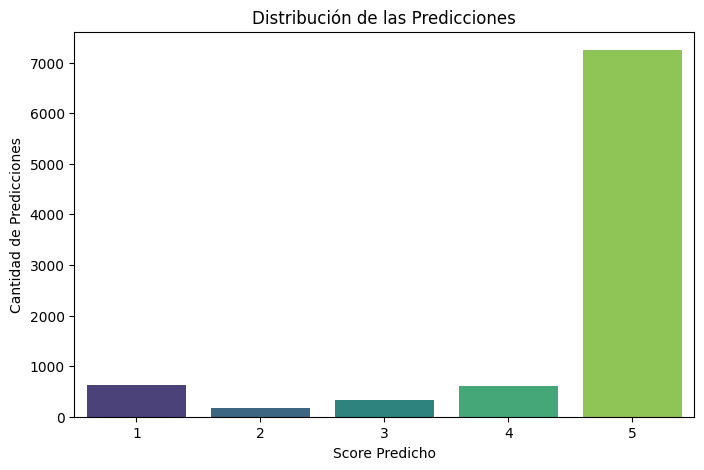

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un gráfico de la distribución de las predicciones
plt.figure(figsize=(8, 5))
sns.countplot(x=predictions, palette="viridis")

plt.title("Distribución de las Predicciones")
plt.xlabel("Score Predicho")
plt.ylabel("Cantidad de Predicciones")
plt.show()

# Añadiendo nuevas variables:

In [94]:
import pandas as pd
import gensim.downloader as api
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
import json
import lightgbm as lgb
from textblob import TextBlob  # Importar TextBlob para análisis de sentimiento

# Descargar stopwords de NLTK
nltk.download('stopwords')
nltk.download('wordnet')

# Cargar el modelo preentrenado de FastText
model = api.load("glove-wiki-gigaword-100")

# Función para obtener el vector promedio de un texto
def get_average_vector(text, model):
    tokens = text.split()  # Tokenizamos el texto
    vectors = [model[word] for word in tokens if word in model]  # Conseguimos el vector de cada palabra
    if len(vectors) > 0:
        return sum(vectors) / len(vectors)  # Promediamos los vectores
    else:
        return np.zeros(model.vector_size)  # Si no hay vectores, devolvemos un vector de ceros

# Función para limpiar el texto
def clean_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar caracteres especiales, números y puntuación
    text = re.sub(r'[^a-z\s]', '', text)  # Sólo letras y espacios
    return text

# Función para eliminar stopwords y lematizar
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))  # Usamos stopwords en inglés

def preprocess_text(text):
    words = text.split()
    # Eliminar stopwords y lematizar
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(cleaned_words)

# Función para obtener el análisis de sentimiento
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # Un valor entre -1 (negativo) y 1 (positivo)

# Función para obtener la longitud de las oraciones
def sentence_length(text):
    return len(re.findall(r'\.', text))  # Cuenta los puntos como delimitadores de oraciones

# Función para contar signos de puntuación
def count_punctuation(text):
    exclamation_count = text.count('!')
    question_count = text.count('?')
    return exclamation_count, question_count

# Cargar y limpiar los conjuntos de datos
train = pd.read_csv('train/train.csv', sep=';')
test = pd.read_csv('test/test.csv', sep=';')

# Llenar valores nulos en 'Summary' y 'Text' con cadenas vacías
train['Summary'] = train['Summary'].fillna('')
train['Text'] = train['Text'].fillna('')

# Crear la columna 'Review' concatenando 'Summary' y 'Text'
train['Review'] = train['Summary'] + ' ' + train['Text']
test['Summary'] = test['Summary'].fillna('')
test['Text'] = test['Text'].fillna('')
test['Review'] = test['Summary'] + ' ' + test['Text']

# Limpiar el texto en la columna 'Review'
train['Review'] = train['Review'].apply(clean_text)
test['Review'] = test['Review'].apply(clean_text)

# Aplicar la función de preprocesamiento al texto (eliminar stopwords y lematizar)
train['Review'] = train['Review'].apply(preprocess_text)
test['Review'] = test['Review'].apply(preprocess_text)

# Añadir la columna de análisis de sentimiento (polaridad)
train['Sentiment'] = train['Review'].apply(get_sentiment)
test['Sentiment'] = test['Review'].apply(get_sentiment)

# Añadir longitud de las frases como nueva característica
train['Sentence_Length'] = train['Review'].apply(sentence_length)
test['Sentence_Length'] = test['Review'].apply(sentence_length)

# Añadir el conteo de signos de puntuación como nuevas características
train['Exclamation_Count'], train['Question_Count'] = zip(*train['Review'].apply(count_punctuation))
test['Exclamation_Count'], test['Question_Count'] = zip(*test['Review'].apply(count_punctuation))

# Aplicar la función para obtener el vector promedio de las reseñas
train['Review_Vector'] = train['Review'].apply(lambda x: get_average_vector(x, model))
test['Review_Vector'] = test['Review'].apply(lambda x: get_average_vector(x, model))

# ---- Añadir el vectorizador TF-IDF ----
vectorizer = TfidfVectorizer(max_features=5000)  # Limitar a 5000 características
X_tfidf = vectorizer.fit_transform(train['Review'])

# ---- Convertir las características adicionales a un formato adecuado ----
# Convertir las columnas adicionales a un formato de array 2D
additional_features_train = np.column_stack([train['Sentiment'], train['Sentence_Length'], train['Exclamation_Count'], train['Question_Count'], np.array(train['Review_Vector'].tolist())])
additional_features_test = np.column_stack([test['Sentiment'], test['Sentence_Length'], test['Exclamation_Count'], test['Question_Count'], np.array(test['Review_Vector'].tolist())])

# Combinar las características adicionales con el conjunto de datos original
X_train_combined = np.hstack([X_tfidf.toarray(), additional_features_train])
X_test_combined = np.hstack([vectorizer.transform(test['Review']).toarray(), additional_features_test])

# La variable objetivo (Score)
y = train['Score']

# Dividir el conjunto de datos en train y validación (70% / 30%)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_combined, y, test_size=0.3, random_state=42)

# ---- Entrenamiento del modelo con LightGBM ----
lgbm_model = lgb.LGBMClassifier(objective='multiclass', num_class=5, learning_rate=0.05, n_estimators=1000, max_depth=7, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
lgbm_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de validación
y_pred_lgbm = lgbm_model.predict(X_valid)

# Evaluar el modelo usando F1 Score
f1_lgbm = f1_score(y_valid, y_pred_lgbm, average='weighted')  # F1 ponderado
print(f"F1 Score con LGBM: {f1_lgbm:.4f}")

# Ver el reporte de clasificación
print(classification_report(y_valid, y_pred_lgbm))

# ---- Predicciones en el conjunto de test ----
predictions = lgbm_model.predict(X_test_combined)

# Crear el archivo JSON con las predicciones
predictions_dict = {k: int(v) for k, v in zip(test['Test_id'], predictions)}

# Guardar las predicciones en el archivo predictions.json
with open('predictions/predictions.json', 'w') as f:
    json.dump({"target": predictions_dict}, f, indent=4)

print("Archivo predictions.json creado exitosamente.")




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jjaavviieerroperro\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jjaavviieerroperro\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Package wordnet is already up-to-date!


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0,074776 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 83176
[LightGBM] [Info] Number of data points in the train set: 14700, number of used features: 1697
[LightGBM] [Info] Start training from score -2,344258
[LightGBM] [Info] Start training from score -2,859823
[LightGBM] [Info] Start training from score -2,539427
[LightGBM] [Info] Start training from score -1,899390
[LightGBM] [Info] Start training from score -0,480893
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

C:\Users\Jjaavviieerroperro\AppData\Local\Temp\ipykernel_15456\626043300.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=predictions, palette="viridis")


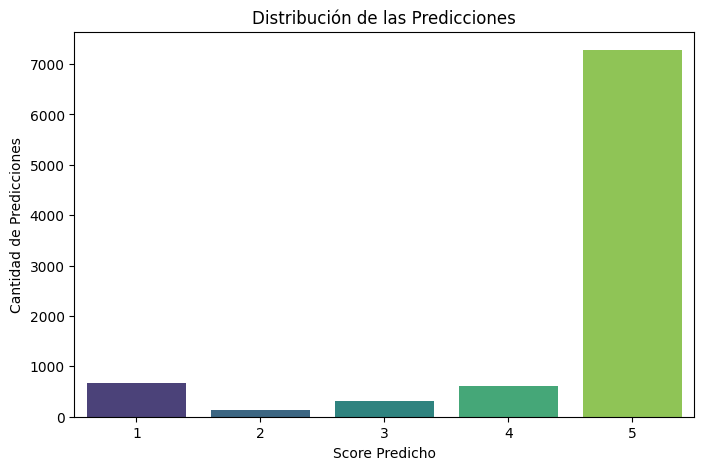

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un gráfico de la distribución de las predicciones
plt.figure(figsize=(8, 5))
sns.countplot(x=predictions, palette="viridis")

plt.title("Distribución de las Predicciones")
plt.xlabel("Score Predicho")
plt.ylabel("Cantidad de Predicciones")
plt.show()